1) There will be 5 images that we will choose that exhibit different scales, orientation, locations, and lighting. (Question: Do These 5 images need to look similar to the one shown in the preprocessing segment of the project file pdf?)

2) For each image, use MSER/Sliding window to detect ROIs
3) Do digit classification on ROI using the CNN models (custom and VGG) trained from the sample dataset 
4) Generate digit sequence in correct order

detection --> recognition --> final output

In [18]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal
import cv2

In [2]:
def img_with_contours(img, regions=None):
    if len(img.shape)==2:
        new_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    else:
        new_img = img.copy()
    if regions:
        for region in regions:
            x, y, w, h = cv2.boundingRect(region)
            cv2.rectangle(new_img, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

    new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
    plt.imshow(new_img)
    plt.axis('off')
    plt.title('MSER Detected Regions')
    plt.show()
    return

**SAMPLE FULL NUMBERS**

In [38]:
CURR_INPUT_DIR = 'SVHN-dataset/full-numbers/train/'
test1 = cv2.imread(CURR_INPUT_DIR + '4.png')
test2 = cv2.imread(CURR_INPUT_DIR + '5.png')
test3 = cv2.imread(CURR_INPUT_DIR + '6.png')
test4 = cv2.imread(CURR_INPUT_DIR + '7.png')
test5 = cv2.imread(CURR_INPUT_DIR + '8.png')
test6 = cv2.imread(CURR_INPUT_DIR + '9.png')
test7 = cv2.imread(CURR_INPUT_DIR + '1.png')
test8 = cv2.imread(CURR_INPUT_DIR + '2.png')
test9 = cv2.imread(CURR_INPUT_DIR + '3.png')

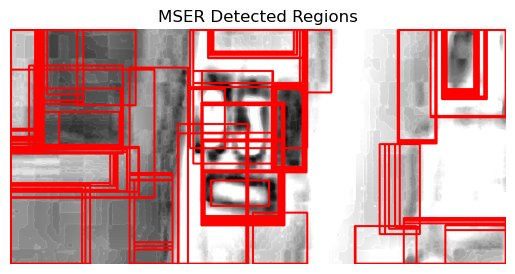

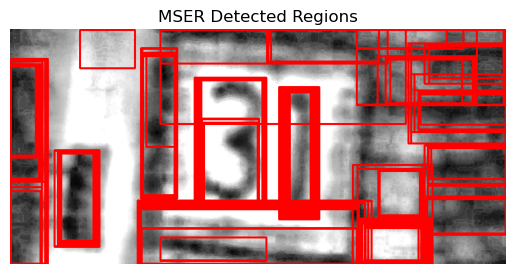

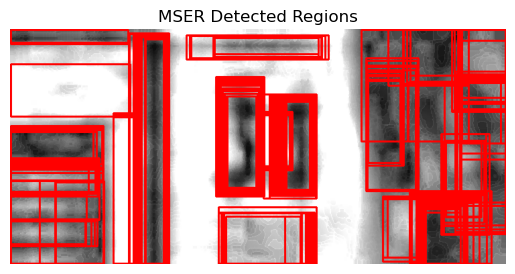

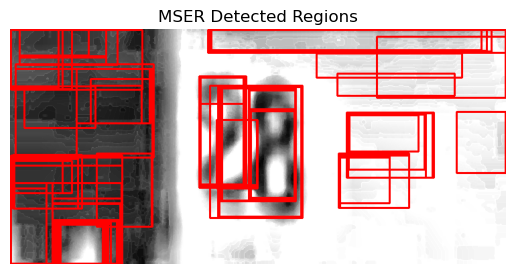

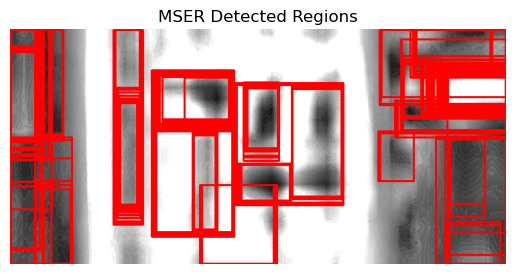

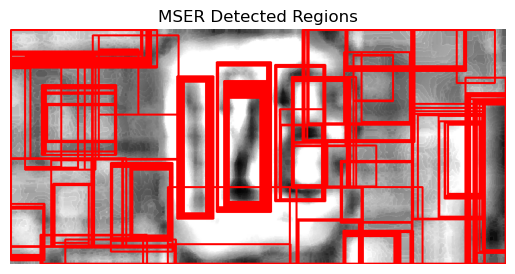

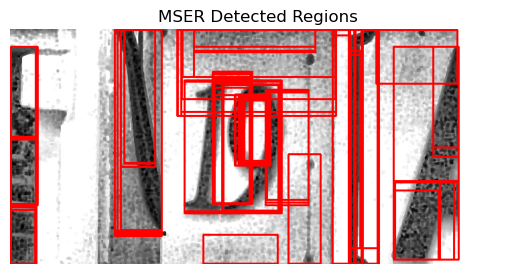

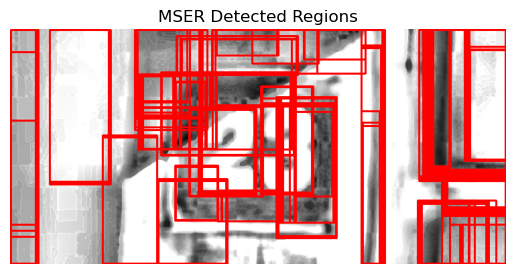

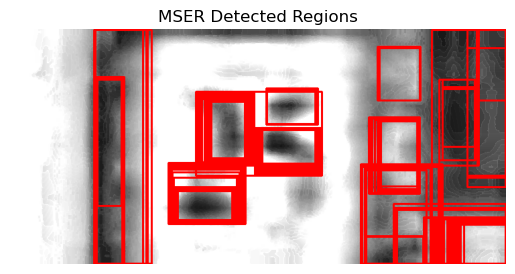

In [95]:
def test_pipeline(img):
    curr_img = img.copy()#.astype(np.float32)
    mser = cv2.MSER_create(
                        delta=0,
                        min_area=2300,
                        max_area=10000,
    )

    # ----- BEGINNING THE PIPELINE -----
    new_shape = (740, 350)                                                      # Resizing
    curr_img = cv2.resize(curr_img, new_shape)
    resized_img = curr_img

    curr_img = cv2.cvtColor(curr_img, cv2.COLOR_BGR2GRAY)                       # Greyscaling

    # @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
    blurred = cv2.GaussianBlur(curr_img, (5, 5), 0)

    # 3. Enhance contrast using CLAHE
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(blurred)

    # 4. Sharpen the image
    kernel = np.array([[-1, -1, -1],
                       [-1,  9.5, -1],
                       [-1, -1, -1]])
    curr_img = cv2.filter2D(enhanced, -1, kernel)

    # 5. Thresholding to isolate numbers
    # _, thresholded = cv2.threshold(curr_img, 200, 255, cv2.THRESH_BINARY) # Adjust 100

    # 6. Morphological closing to connect broken parts
    kernel = np.ones((3, 3), np.uint8)
    curr_img = cv2.morphologyEx(curr_img, cv2.MORPH_CLOSE, kernel, iterations=1)

    # @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



    regions, _ = mser.detectRegions(curr_img)
    img_with_contours(curr_img)#, regions)


test_pipeline(test1)
test_pipeline(test2)
test_pipeline(test3)
test_pipeline(test4)
test_pipeline(test5)
test_pipeline(test6)
test_pipeline(test7)
test_pipeline(test8)
test_pipeline(test9)

In [5]:
# k_size = 9                                                                # Gaussian Blurring
# sigma = 10
# curr_img = cv2.GaussianBlur(curr_img, (k_size, k_size), sigma)

# k_size = 3                                                                  # CLAHE-ing
# cliplim = 9.0
# clahe = cv2.createCLAHE(clipLimit=cliplim, tileGridSize=(k_size, k_size))
# curr_img = clahe.apply(curr_img) 

# _, threshold1 = cv2.threshold(curr_img, 0, 80, cv2.THRESH_BINARY)           # Thresholding / Bitwising
# _, threshold2 = cv2.threshold(curr_img, 127, 100, cv2.THRESH_BINARY)
# _, threshold3 = cv2.threshold(curr_img, 255, 200, cv2.THRESH_BINARY)
# curr_img = cv2.bitwise_or( cv2.bitwise_or(threshold1, threshold2), threshold3)

# kernel = np.ones((5, 5), np.uint8)  # Erosion kernel
# curr_img = cv2.erode(curr_img, kernel, iterations=5)
# curr_img = cv2.dilate(curr_img, kernel, iterations=1)